In [98]:
from pymongo import MongoClient
import pandas as pd
from scipy import stats

In [132]:
# Connect to MongoDB and load all logs into a DataFrame
client = MongoClient('mongodb://localhost:27017/')
db = client['user_db']
logs_collection = db['user_logs']

In [100]:
logs = pd.DataFrame(list(logs_collection.find()))

In [101]:
logs

,_id,user,action,details,timestamp
0,6868331278b9f6fa6049f95b,"{'userId': 1, 'username': 'mohit'}",login,{},2025-07-04 20:01:22.656
1,6868331278b9f6fa6049f95c,"{'userId': 7, 'username': 'rahul'}",logout,{},2025-07-01 21:05:39.793
2,6868331278b9f6fa6049f95d,"{'userId': 4, 'username': 'arjun'}",login,{},2025-06-28 03:03:08.327
3,6868331278b9f6fa6049f95e,"{'userId': 8, 'username': 'vikram'}",request recommendation,{'type': 'Content-Based Recommendation'},2025-06-27 22:24:12.267
4,6868331278b9f6fa6049f95f,"{'userId': 1, 'username': 'mohit'}",logout,{},2025-06-30 07:20:12.400
...,...,...,...,...,...
391,686833e47625b794f0ac97f3,"{'userId': 10, 'username': 'manish'}",save_ratings,"{'watched_movies': ['12', '34'], 'rated_movies...",2025-07-01 02:02:22.290
392,686833e47625b794f0ac97f4,"{'userId': 1, 'username': 'mohit'}",request recommendation,{'type': 'Collaborative Recommendation'},2025-07-03 00:02:38.796
393,686833e47625b794f0ac97f5,"{'userId': 6, 'username': 'karan'}",login,{},2025-07-03 11:34:16.094
394,686833e47625b794f0ac97f6,"{'userId': 9, 'username': 'aarav'}",logout,{},2025-07-03 13:43:42.964


In [102]:
logs.shape

(396, 5)

In [103]:
logs['timestamp'] = pd.to_datetime(logs['timestamp'])

In [104]:
# Extract username into its own column
logs['username'] = logs['user'].apply(
    lambda u: u.get('username') if isinstance(u, dict) else None
)

In [105]:
reqs = logs[logs['action'] == 'request recommendation']

In [106]:
reqs

,_id,user,action,details,timestamp,username
3,6868331278b9f6fa6049f95e,"{'userId': 8, 'username': 'vikram'}",request recommendation,{'type': 'Content-Based Recommendation'},2025-06-27 22:24:12.267,vikram
19,6868331278b9f6fa6049f972,"{'userId': 7, 'username': 'rahul'}",request recommendation,{'type': 'Content-Based Recommendation'},2025-06-30 10:44:43.443,rahul
24,6868331278b9f6fa6049f977,"{'userId': 9, 'username': 'aarav'}",request recommendation,{'type': 'Content-Based Recommendation'},2025-06-28 16:30:16.548,aarav
25,6868331278b9f6fa6049f978,"{'userId': 9, 'username': 'aarav'}",request recommendation,{'type': 'Content-Based Recommendation'},2025-07-04 08:00:41.731,aarav
26,6868331278b9f6fa6049f979,"{'userId': 10, 'username': 'manish'}",request recommendation,{'type': 'Content-Based Recommendation'},2025-07-02 00:17:38.866,manish
...,...,...,...,...,...,...
370,686833e47625b794f0ac97de,"{'userId': 6, 'username': 'karan'}",request recommendation,{'type': 'Collaborative Recommendation'},2025-07-02 01:41:49.803,karan
372,686833e47625b794f0ac97e0,"{'userId': 7, 'username': 'rahul'}",request recommendation,{'type': 'Content-Based Recommendation'},2025-07-01 04:56:03.793,rahul
382,686833e47625b794f0ac97ea,"{'userId': 6, 'username': 'karan'}",request recommendation,{'type': 'Collaborative Recommendation'},2025-06-29 18:04:46.587,karan
390,686833e47625b794f0ac97f2,"{'userId': 3, 'username': 'rohan'}",request recommendation,{'type': 'Collaborative Recommendation'},2025-06-30 08:48:09.504,rohan


# Request‐Count (your “most recommendation click” analogue)

In [133]:
# labeling each request as A and B
def label_varient(details):
    if details.get('type') == "Collaborative Recommendation":
        return 'A'   # group A = collaborative
    else:
        return 'B'   # group B = content-based

In [108]:
reqs['varient'] = reqs['details'].apply(label_varient)

C:\Users\write\AppData\Local\Temp\ipykernel_12212\3717335074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reqs['varient'] = reqs['details'].apply(label_varient)


In [109]:
reqs

,_id,user,action,details,timestamp,username,varient
3,6868331278b9f6fa6049f95e,"{'userId': 8, 'username': 'vikram'}",request recommendation,{'type': 'Content-Based Recommendation'},2025-06-27 22:24:12.267,vikram,B
19,6868331278b9f6fa6049f972,"{'userId': 7, 'username': 'rahul'}",request recommendation,{'type': 'Content-Based Recommendation'},2025-06-30 10:44:43.443,rahul,B
24,6868331278b9f6fa6049f977,"{'userId': 9, 'username': 'aarav'}",request recommendation,{'type': 'Content-Based Recommendation'},2025-06-28 16:30:16.548,aarav,B
25,6868331278b9f6fa6049f978,"{'userId': 9, 'username': 'aarav'}",request recommendation,{'type': 'Content-Based Recommendation'},2025-07-04 08:00:41.731,aarav,B
26,6868331278b9f6fa6049f979,"{'userId': 10, 'username': 'manish'}",request recommendation,{'type': 'Content-Based Recommendation'},2025-07-02 00:17:38.866,manish,B
...,...,...,...,...,...,...,...
370,686833e47625b794f0ac97de,"{'userId': 6, 'username': 'karan'}",request recommendation,{'type': 'Collaborative Recommendation'},2025-07-02 01:41:49.803,karan,A
372,686833e47625b794f0ac97e0,"{'userId': 7, 'username': 'rahul'}",request recommendation,{'type': 'Content-Based Recommendation'},2025-07-01 04:56:03.793,rahul,B
382,686833e47625b794f0ac97ea,"{'userId': 6, 'username': 'karan'}",request recommendation,{'type': 'Collaborative Recommendation'},2025-06-29 18:04:46.587,karan,A
390,686833e47625b794f0ac97f2,"{'userId': 3, 'username': 'rohan'}",request recommendation,{'type': 'Collaborative Recommendation'},2025-06-30 08:48:09.504,rohan,A


In [110]:
reqs_count = reqs.groupby('varient').size()

In [111]:
reqs_count

varient
A    44
B    57
dtype: int64

In [112]:
print(f"Total Requests: \n{reqs_count}")

Total Requests: 
varient
A    44
B    57
dtype: int64


###### Ploting

In [113]:
total_clicks = [reqs_count[0], reqs_count[1]]
algo = ["Collaborative Recommendation", "Content Based"]

C:\Users\write\AppData\Local\Temp\ipykernel_12212\2268965689.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_clicks = [reqs_count[0], reqs_count[1]]


In [114]:
total_clicks

[np.int64(44), np.int64(57)]

In [115]:
algo

['Collaborative Recommendation', 'Content Based']

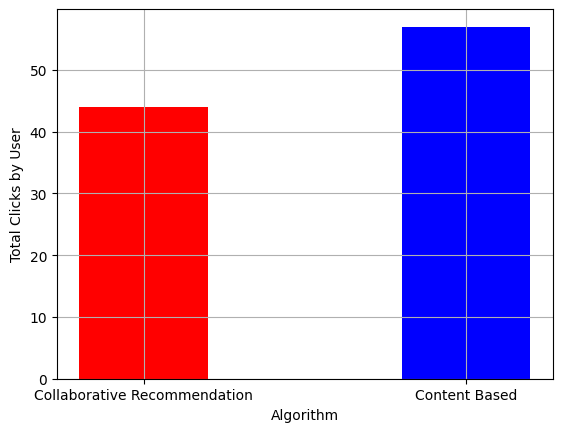

In [116]:
plt.bar(algo, total_clicks, color=['r', 'b'], width=0.4)
plt.xlabel("Algorithm")
plt.ylabel("Total Clicks by User")

plt.grid()
plt.show()

# Success Rates (Rating to Movies)


#### We Check - Did the user ever rate any movie after each request?

In [117]:
def did_rate(row):
    user = row['username']
    t0 = row['timestamp']

    mask = (
        (logs['username'] == user) &
        (logs['action'] == 'save_ratings') & 
        (logs['timestamp'] > t0)
    )
    
    return int(mask.any())

In [118]:
reqs

,_id,user,action,details,timestamp,username,varient
3,6868331278b9f6fa6049f95e,"{'userId': 8, 'username': 'vikram'}",request recommendation,{'type': 'Content-Based Recommendation'},2025-06-27 22:24:12.267,vikram,B
19,6868331278b9f6fa6049f972,"{'userId': 7, 'username': 'rahul'}",request recommendation,{'type': 'Content-Based Recommendation'},2025-06-30 10:44:43.443,rahul,B
24,6868331278b9f6fa6049f977,"{'userId': 9, 'username': 'aarav'}",request recommendation,{'type': 'Content-Based Recommendation'},2025-06-28 16:30:16.548,aarav,B
25,6868331278b9f6fa6049f978,"{'userId': 9, 'username': 'aarav'}",request recommendation,{'type': 'Content-Based Recommendation'},2025-07-04 08:00:41.731,aarav,B
26,6868331278b9f6fa6049f979,"{'userId': 10, 'username': 'manish'}",request recommendation,{'type': 'Content-Based Recommendation'},2025-07-02 00:17:38.866,manish,B
...,...,...,...,...,...,...,...
370,686833e47625b794f0ac97de,"{'userId': 6, 'username': 'karan'}",request recommendation,{'type': 'Collaborative Recommendation'},2025-07-02 01:41:49.803,karan,A
372,686833e47625b794f0ac97e0,"{'userId': 7, 'username': 'rahul'}",request recommendation,{'type': 'Content-Based Recommendation'},2025-07-01 04:56:03.793,rahul,B
382,686833e47625b794f0ac97ea,"{'userId': 6, 'username': 'karan'}",request recommendation,{'type': 'Collaborative Recommendation'},2025-06-29 18:04:46.587,karan,A
390,686833e47625b794f0ac97f2,"{'userId': 3, 'username': 'rohan'}",request recommendation,{'type': 'Collaborative Recommendation'},2025-06-30 08:48:09.504,rohan,A


In [119]:
reqs["rated_flag"] = reqs.apply(did_rate, axis=1)

C:\Users\write\AppData\Local\Temp\ipykernel_12212\1914979867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reqs["rated_flag"] = reqs.apply(did_rate, axis=1)


In [120]:
reqs

,_id,user,action,details,timestamp,username,varient,rated_flag
3,6868331278b9f6fa6049f95e,"{'userId': 8, 'username': 'vikram'}",request recommendation,{'type': 'Content-Based Recommendation'},2025-06-27 22:24:12.267,vikram,B,1
19,6868331278b9f6fa6049f972,"{'userId': 7, 'username': 'rahul'}",request recommendation,{'type': 'Content-Based Recommendation'},2025-06-30 10:44:43.443,rahul,B,1
24,6868331278b9f6fa6049f977,"{'userId': 9, 'username': 'aarav'}",request recommendation,{'type': 'Content-Based Recommendation'},2025-06-28 16:30:16.548,aarav,B,1
25,6868331278b9f6fa6049f978,"{'userId': 9, 'username': 'aarav'}",request recommendation,{'type': 'Content-Based Recommendation'},2025-07-04 08:00:41.731,aarav,B,0
26,6868331278b9f6fa6049f979,"{'userId': 10, 'username': 'manish'}",request recommendation,{'type': 'Content-Based Recommendation'},2025-07-02 00:17:38.866,manish,B,1
...,...,...,...,...,...,...,...,...
370,686833e47625b794f0ac97de,"{'userId': 6, 'username': 'karan'}",request recommendation,{'type': 'Collaborative Recommendation'},2025-07-02 01:41:49.803,karan,A,0
372,686833e47625b794f0ac97e0,"{'userId': 7, 'username': 'rahul'}",request recommendation,{'type': 'Content-Based Recommendation'},2025-07-01 04:56:03.793,rahul,B,1
382,686833e47625b794f0ac97ea,"{'userId': 6, 'username': 'karan'}",request recommendation,{'type': 'Collaborative Recommendation'},2025-06-29 18:04:46.587,karan,A,1
390,686833e47625b794f0ac97f2,"{'userId': 3, 'username': 'rohan'}",request recommendation,{'type': 'Collaborative Recommendation'},2025-06-30 08:48:09.504,rohan,A,1


In [121]:
reqs.groupby('varient')['rated_flag'].size()

varient
A    44
B    57
Name: rated_flag, dtype: int64

In [122]:
rating_conv = reqs.groupby('varient')['rated_flag'].mean()

In [123]:
print("Rating Success-rate:")
print(rating_conv, "\n")

Rating Success-rate:
varient
A    0.659091
B    0.859649
Name: rated_flag, dtype: float64 



In [124]:
from matplotlib import pyplot as plt

In [125]:
algo = ['Collaborative Recommendation', 'Content Based']

In [126]:
success_rate = [rating_conv[0], rating_conv[1]]

C:\Users\write\AppData\Local\Temp\ipykernel_12212\2705771983.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  success_rate = [rating_conv[0], rating_conv[1]]


In [127]:
success_rate

[np.float64(0.6590909090909091), np.float64(0.8596491228070176)]

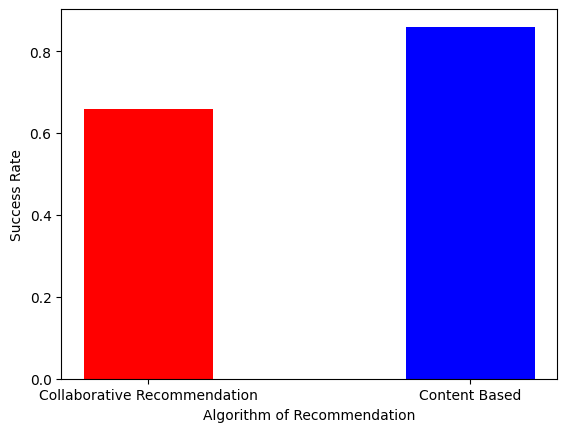

In [128]:
plt.bar(algo, success_rate, color=['r','b'], width=0.4)
plt.xlabel("Algorithm of Recommendation")
plt.ylabel("Success Rate")
plt.show()

# Conclusion

- As per the both plotting, We see that Content Based recommendation is better. In the first plot, it has more total clicks by users than Collaborative one.


- In the second graph, also Content Based is showing higher success rate. It means more users gave ratings after using this method.

- So, overall Content Based algorithm is looking more effective in both ways-
- - it gets more clicks and more ratings.
  - So, it can be a better choice for recommendation system.
